## Exploratory Data Analysis on Google Play Store Apps

# 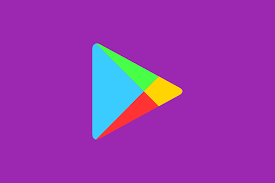

#### Analyzing the Apps on Google Playstore to gain an insight into the present apps market


#### Introduction

With this project I will take you through a journey of analyzing various apps found on the google play store 
with the help of different python libraries. The dataset is been taken from Kaggle
It consists of 13 columns(App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, and Android Ver) with 10841 Rows.

In [1]:
#Importing the required libraries

import pandas as pd                   # Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data
import numpy as np                    # NumPy is a Python library used for working with arrays.It also has functions for working in domain of linear algebra,and matrices
import plotly.express as px           # The plotly.express module (usually imported as px ) contains functions that can create entire figures at once
from scipy import stats               # SciPy is a scientific computation library that uses NumPy underneath. SciPy stands for Scientific Python. It provides more utility functions for optimization, stats and signal processing.
import matplotlib.pyplot as plt       # Matplotlib is a python library used to create 2D graphs and plots by using python scripts. It has a module named pyplot which makes things easy for plotting by providing feature to control line styles, font properties, formatting axes etc
import seaborn as sns                 # Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphs.
import warnings                       # The warnings filter controls whether warnings are ignored, displayed, or turned into errors (raising an exception)
warnings.filterwarnings('ignore')     # "ignore"- never print matching warnings

In [2]:
data = pd.read_csv('C:/Users/HP/gps.csv')           # Loading the dataset as a pandas data frame.
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [3]:
# To know if there is any missing value or Nan value in the dataset, we can use the isnull() function

data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

The dataset contains many Null or missing values. The column Rating, Type , Content Rating , Current Ver , and Android Ver contains 1474, 1, 1, 8, and 3 missing values respectively.

In [4]:
# we can define a function to get more useful information about the different features of the dataset

def print_feature_info():
    temp = pd.DataFrame(index= data.columns)
    temp['data_type'] = data.dtypes
    temp['missing_values'] = data.isnull().sum()
    temp['unique_count'] = data.nunique()
    return temp

In [5]:
print_feature_info()                # Let’s call the function and see what it returns

,data_type,missing_values,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


we can now see the number of missing values of any feature, its unique count, and its respective data types.

#### DATA CLEANING

##### Filling the missing values in each column

In [6]:
# lets start with the column Type

data[data.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


Since there is only one missing value in this column, So, let’s fill the missing value. After cross-checking in the play store the missing value is found to be Free, So we can fill the missing value with free

In [7]:
data['Type'].fillna("Free", inplace=True)

In [8]:
# After filling the value we can check and see if that has been correctly placed

data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
# Now, we can move on to the column Content Rating

data[data['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
data.loc[10464:10484, :]  # observing the nearby rows 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10464,fi,FAMILY,2.9,691,5.8M,"100,000+",Free,0,Everyone,Strategy,"June 8, 2016",1.0.3,4.0 and up
10465,Portable Wi-Fi hotspot Free,COMMUNICATION,4.0,1711,2.1M,"100,000+",Free,0,Everyone,Communication,"January 11, 2018",1.2.5.4-11,2.3 and up
10466,Wi-Fi Networks,PRODUCTIVITY,4.2,115,1.4M,"10,000+",Free,0,Everyone,Productivity,"October 5, 2015",1.4,4.1 and up
10467,FI CFL,FINANCE,3.7,112,3.9M,"10,000+",Free,0,Everyone,Finance,"July 5, 2018",1.1.1,5.0 and up
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


In [11]:
data.iloc[10464:10484, 0:13]  

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10464,fi,FAMILY,2.9,691,5.8M,"100,000+",Free,0,Everyone,Strategy,"June 8, 2016",1.0.3,4.0 and up
10465,Portable Wi-Fi hotspot Free,COMMUNICATION,4.0,1711,2.1M,"100,000+",Free,0,Everyone,Communication,"January 11, 2018",1.2.5.4-11,2.3 and up
10466,Wi-Fi Networks,PRODUCTIVITY,4.2,115,1.4M,"10,000+",Free,0,Everyone,Productivity,"October 5, 2015",1.4,4.1 and up
10467,FI CFL,FINANCE,3.7,112,3.9M,"10,000+",Free,0,Everyone,Finance,"July 5, 2018",1.1.1,5.0 and up
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


In [12]:
data['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [13]:
data['Rating'].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.7       25
2.6       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

This row (row no:10472) has missing values as well as many wrong data (ie Category, Rating, Price, Genres etc ), so it is better to drop this row from the dataframe

In [14]:
# dropping row no 10472
data.dropna(subset = ['Content Rating'], inplace=True)

We are having some unwanted columns which will be of not much use in the analysis process. So let’s drop those columns ('Last Updated','Current Ver','Android Ver')

In [15]:
data.drop(['Last Updated','Current Ver','Android Ver'], axis=1, inplace=True) # drop unwanted columns

In [16]:
data.head(10) # dataframe after dropping the unwanted columns

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity


Now, we can fix the Rating column which contains a total of 1474 of missing values.

In [17]:
round(data['Rating'].mean(),1)

4.2

In [18]:
data['Rating'].mode()

0    4.4
Name: Rating, dtype: float64

In [19]:
data['Rating'].median()

4.3

In [20]:
Mode_Rating = data['Rating'].mode()

In [21]:
# Replacing the missing values with the Mode value of that entire column.
data['Rating'].fillna(value=Mode_Rating[0], inplace = True) 

Finally, after fixing all the missing values, we should have a look at our data frame, We defined a function as print_feature_info() . So, it’s time to use that function

In [22]:
print_feature_info()

,data_type,missing_values,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


All the columns have the missing_values as zero, which indicates that now the data frame doesn’t contain any missing values

### data preparation

Columns like Reviews, Size, Installs, & price should have an int or float datatype, But here we can see of object type, So let’s convert them to their respective correct type.

In [23]:
# Starting with the column Reviews ,converting its type to int
data['Reviews'] = data.Reviews.astype(int)

We can see that the changes have taken its effect or not by calling our print_feature_info() function

In [24]:
print_feature_info()

,data_type,missing_values,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


Now, the reviews column has been converted to int type, so now we can move to the Column: Size

In [25]:
data['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

Converting the Size Column from object to integer, but this column contains some of the special characters like , , + , M , K & also it has a some of the value as Varies with device . We need to remove all of these and then convert it to int or float .

In [26]:
# Removing the + Symbol
data['Size'] = data.Size.apply(lambda x: x.strip('+'))

In [27]:
# Removing the , symbol
data['Size'] = data.Size.apply(lambda x: x.replace(',', ''))

In [28]:
# Replacing the M symbol by multiplying the value with 1000000
data['Size'] = data.Size.apply(lambda x: x.replace('M', 'e+6')) # For converting the M to Mega

In [29]:
# Replacing the k by multiplying the value with 1000
data['Size'] = data.Size.apply(lambda x: x.replace('k', 'e+3')) # For converting the K to Kilo

In [30]:
# Replacing the Varies with device value with Nan
data['Size'] = data.Size.replace('Varies with device', np.NaN)

In [31]:
# Now, finally converting all these values to numeric type
data['Size'] = pd.to_numeric(data['Size']) # Converting the string to Numeric type

So, after performing all of these operations, we should have a detailed look at that column, so yes again we will call our useful function which we defined. i.e., print_feature_info()

In [32]:
print_feature_info()

,data_type,missing_values,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,6001
Size,float64,1695,459
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


Since we converted the Varies with device value to Nan , so we have to do something with those set of Nan values data. It will be a better idea to drop the Rows of the column Size having Nan values because it will be not an efficient idea to replace those values with mean or mode since the size of some apps would be too large and some of them too small.

In [33]:
data.dropna(subset = ['Size'], inplace=True)

Now lets move to the Column: Installs 

To convert this column from object to integer type. First of all, we will need to remove the + and , symbol from these values.

In [34]:
data['Installs'] = data.Installs.apply(lambda x: x.strip('+')) # removing the + symbol

In [35]:
data['Installs'] = data.Installs.apply(lambda x: x.replace(',', '')) # removing the , symbol

we can now convert it from string type to numeric type, and then have a look at our dataset.

In [36]:
data['Installs'] = pd.to_numeric(data['Installs'])

In [37]:
print_feature_info()

,data_type,missing_values,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


now we are only left with the Price column

In [38]:
data['Price'].value_counts()

0          8421
$0.99       145
$2.99       114
$1.99        66
$4.99        65
           ... 
$389.99       1
$19.90        1
$1.75         1
$14.00        1
$1.04         1
Name: Price, Length: 87, dtype: int64

The values contain a special symbol $ which need to be removed and then it can be converted to the numeric type

In [39]:
data['Price'] = data.Price.apply(lambda x: x.strip('$'))

In [40]:
data['Price'] = pd.to_numeric(data['Price'])

After fixing all the issues, let us have a final look at the features now

In [41]:
print_feature_info()

,data_type,missing_values,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   int32  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(5)
memory usage: 750.2+ KB


now there are 9145 observations in total, out of which only 8434 observations are unique, which means there are some duplicate records which need to be removed

In [43]:
data.duplicated().sum() # number of duplicate records

316

In [44]:
data.drop_duplicates(subset='App',keep='first',inplace=True) # removing duplicate records

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8434 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8434 non-null   object 
 1   Category        8434 non-null   object 
 2   Rating          8434 non-null   float64
 3   Reviews         8434 non-null   int32  
 4   Size            8434 non-null   float64
 5   Installs        8434 non-null   int64  
 6   Type            8434 non-null   object 
 7   Price           8434 non-null   float64
 8   Content Rating  8434 non-null   object 
 9   Genres          8434 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(5)
memory usage: 691.9+ KB


Now, we are finally done with the data cleaning and preparation. We can see that the original dataset contained 10841 Rows and 13 Columns. But after cleaning the dataset and dropping the unwanted rows and columns having Null Values and Garbage data from the data frame, we are left with 8434 Rows and 10 Columns.

#### Data analysis and visualization

#### 1) which are the top categories in the play store, which contains the highest number of apps? 

In [46]:
y = data['Category'].value_counts().index
x = data['Category'].value_counts()
x_axis = []
y_axis = []
for i in range(len(x)):
    x_axis.append(x[i])
    y_axis.append(y[i])

In [47]:
y_axis

['FAMILY',
 'GAME',
 'TOOLS',
 'BUSINESS',
 'MEDICAL',
 'PERSONALIZATION',
 'LIFESTYLE',
 'FINANCE',
 'PRODUCTIVITY',
 'SPORTS',
 'COMMUNICATION',
 'HEALTH_AND_FITNESS',
 'PHOTOGRAPHY',
 'NEWS_AND_MAGAZINES',
 'BOOKS_AND_REFERENCE',
 'SOCIAL',
 'TRAVEL_AND_LOCAL',
 'SHOPPING',
 'DATING',
 'VIDEO_PLAYERS',
 'MAPS_AND_NAVIGATION',
 'EDUCATION',
 'FOOD_AND_DRINK',
 'LIBRARIES_AND_DEMO',
 'AUTO_AND_VEHICLES',
 'ENTERTAINMENT',
 'HOUSE_AND_HOME',
 'ART_AND_DESIGN',
 'EVENTS',
 'WEATHER',
 'PARENTING',
 'COMICS',
 'BEAUTY']

In [48]:
x_axis

[1726,
 873,
 732,
 376,
 369,
 351,
 334,
 299,
 291,
 285,
 242,
 232,
 222,
 201,
 194,
 189,
 173,
 168,
 159,
 127,
 107,
 89,
 88,
 81,
 75,
 64,
 62,
 62,
 57,
 56,
 54,
 49,
 47]

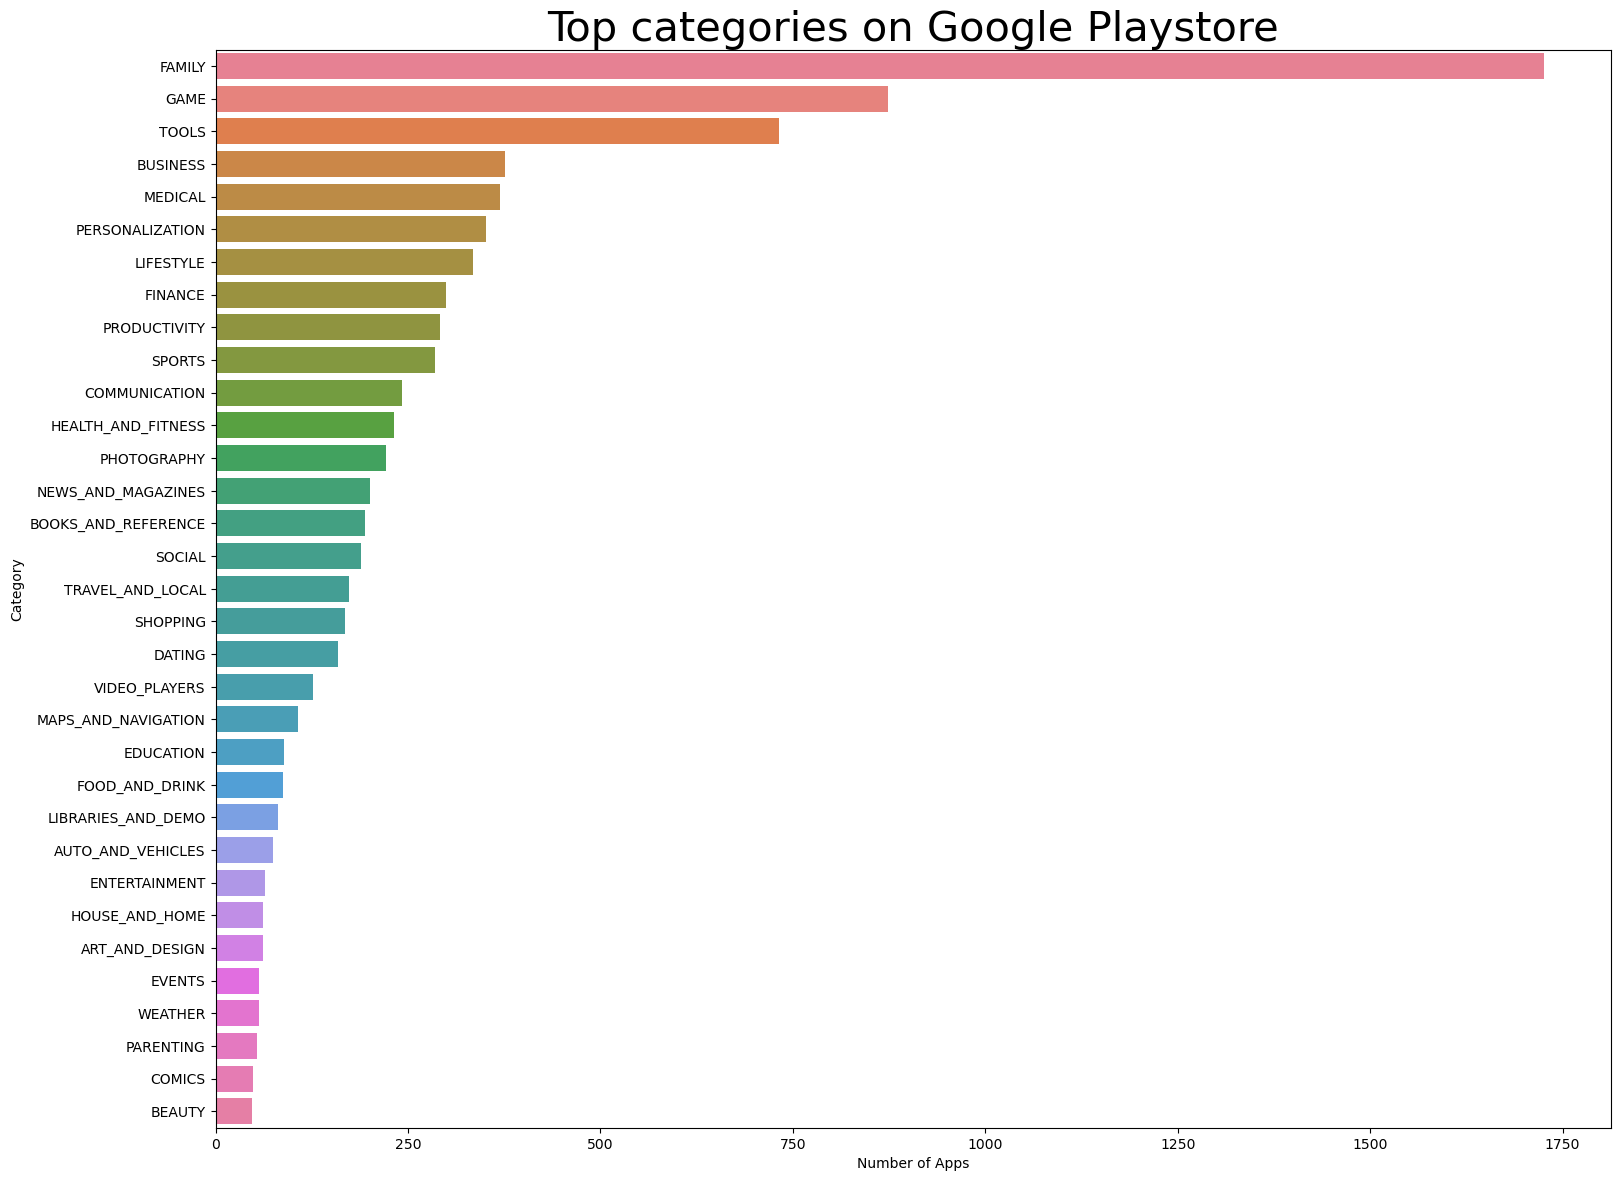

In [49]:
plt.figure(figsize=(18,14))
plt.xlabel("Number of Apps")
plt.ylabel("Category")

graph = sns.barplot(x = x_axis, y = y_axis, palette= "husl")
graph.set_title("Top categories on Google Playstore", fontsize = 30);

From the above plot we can come to the conclusion that, in the play store most of the apps are under Family & Game category and least are in the Beauty & Comics Category.

#### 2) Which category of Apps from the ‘Content Rating’ column is found more on the play store?

In [50]:
x2 = data['Content Rating'].value_counts().index
y2 = data['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

Text(0.5, 0, 'Content Rating')

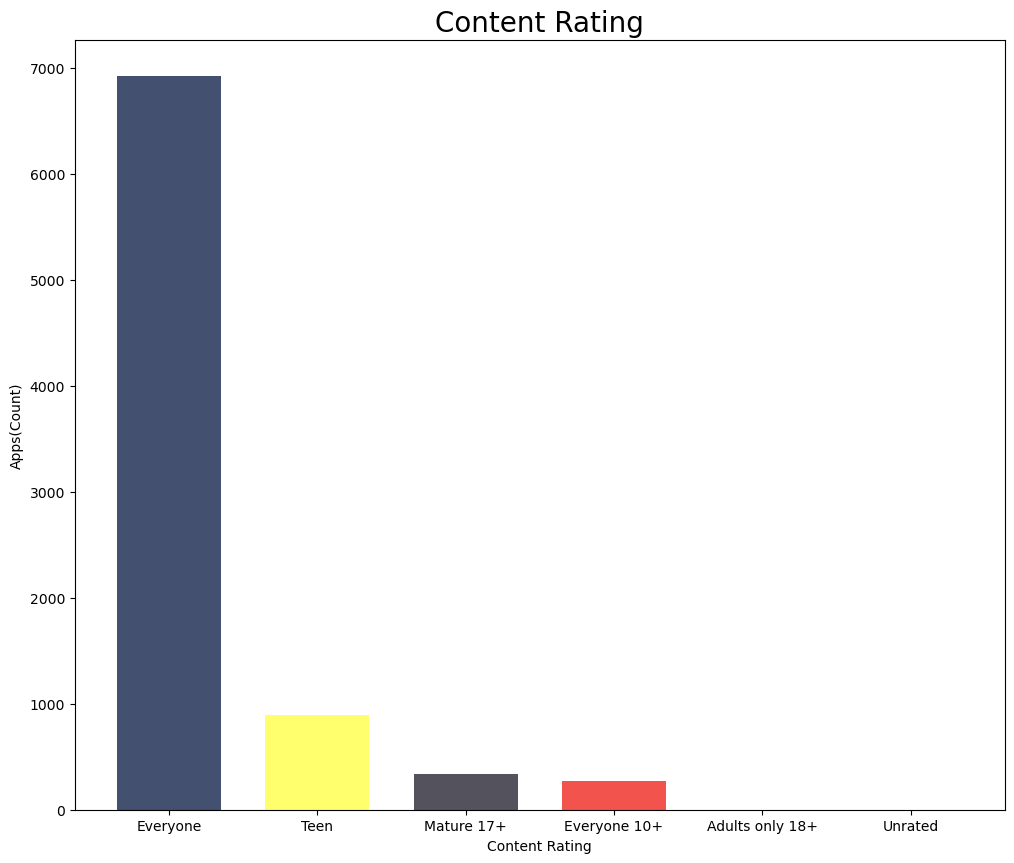

In [51]:
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.7,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8)
plt.title('Content Rating',size = 20)
plt.ylabel('Apps(Count)')
plt.xlabel('Content Rating')

From the above plot, we can see that the Everyone category has the highest number of apps

#### 3) what percentage of the apps in the play store are paid and free?

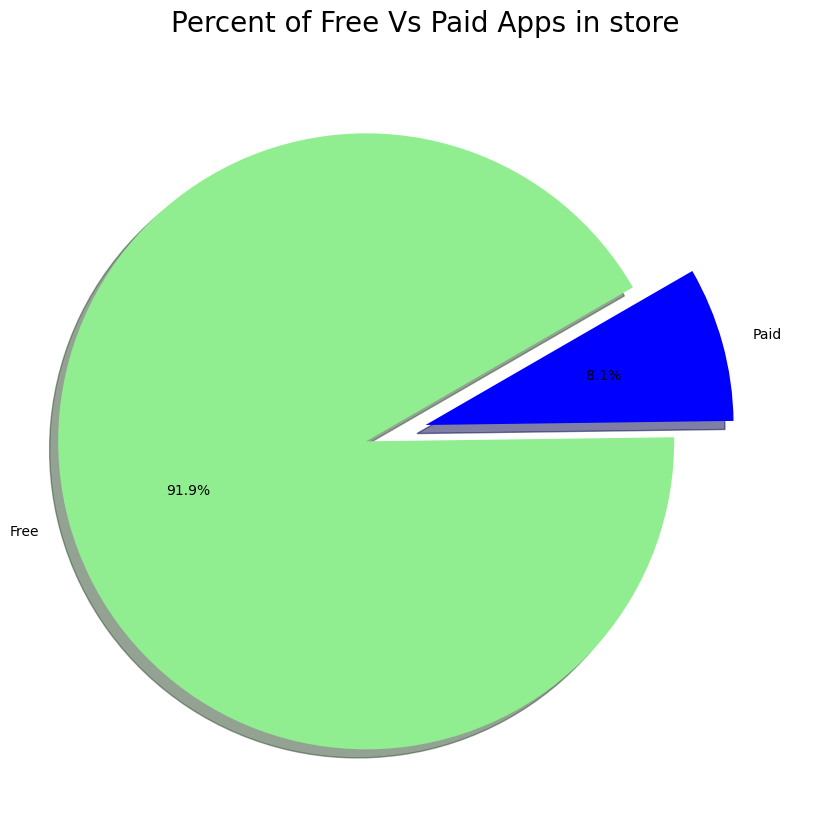

In [52]:
plt.figure(figsize=(10,10))
labels = data['Type'].value_counts(sort = True).index
sizes = data['Type'].value_counts(sort = True)
colors = ["lightgreen","blue"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=30)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

From the above graph, we can see that 92%(Approx.) of apps in the google play store are free and 8%(Approx.) are paid.

#### 4) what is the distribution of the ratings of the apps in the play store?

Text(0.5, 1.0, 'Distribution of Rating')

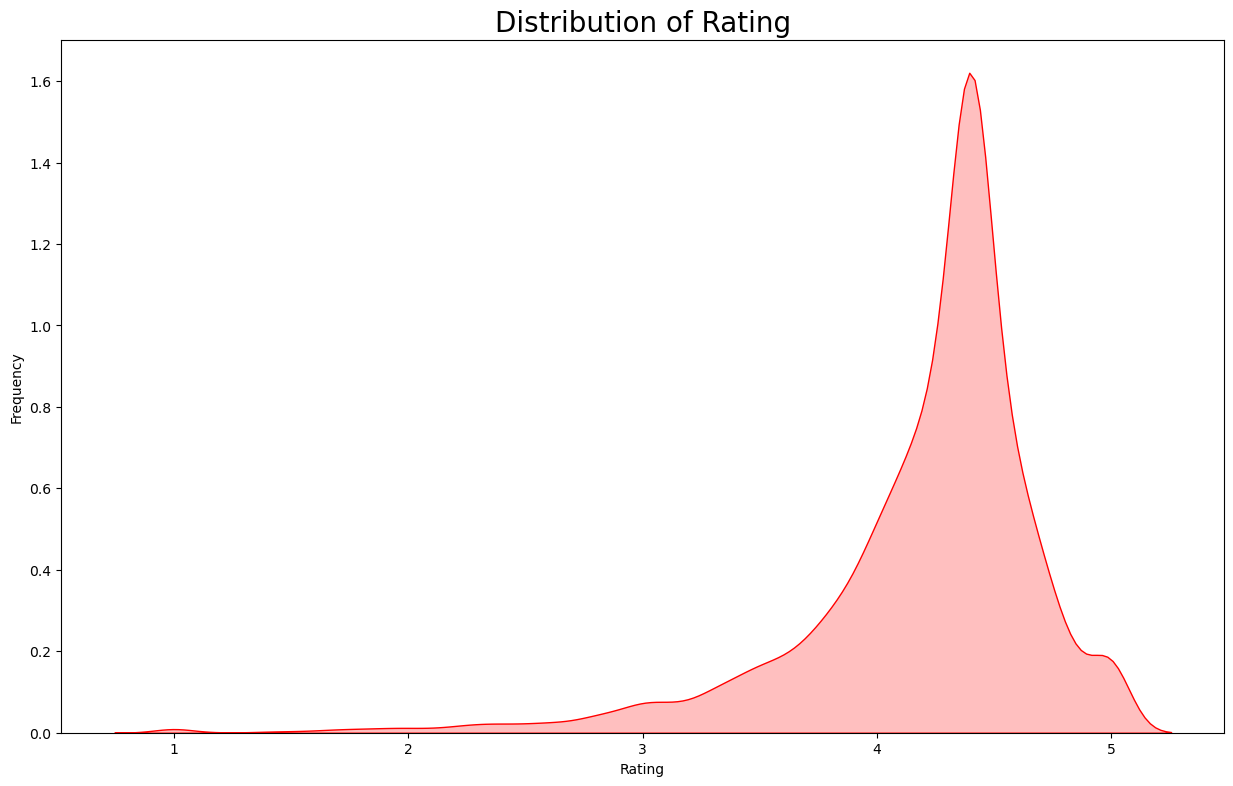

In [53]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(data.Rating, color="Red", shade = True)
plt.title('Distribution of Rating',size = 20)

From the above graph, we can come to the conclusion that most of the apps in the google play store are rated between 4 to 4.8.

#### 5) Which category App’s have the most number of installs?

To answer this question we need to create a separate data frame out of our original data frame which will contain a grouped value by Category and Installs

In [56]:
data.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

,Installs
Category,
GAME,11532464253
FAMILY,3552971425
TOOLS,2891094815
COMMUNICATION,1817943051
PHOTOGRAPHY,1493897655
PRODUCTIVITY,1296312744
NEWS_AND_MAGAZINES,1191005650
PERSONALIZATION,895179772
VIDEO_PLAYERS,866767720


In [57]:
Category_Installs_df = data.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

Text(0.5, 1.0, 'Installs')

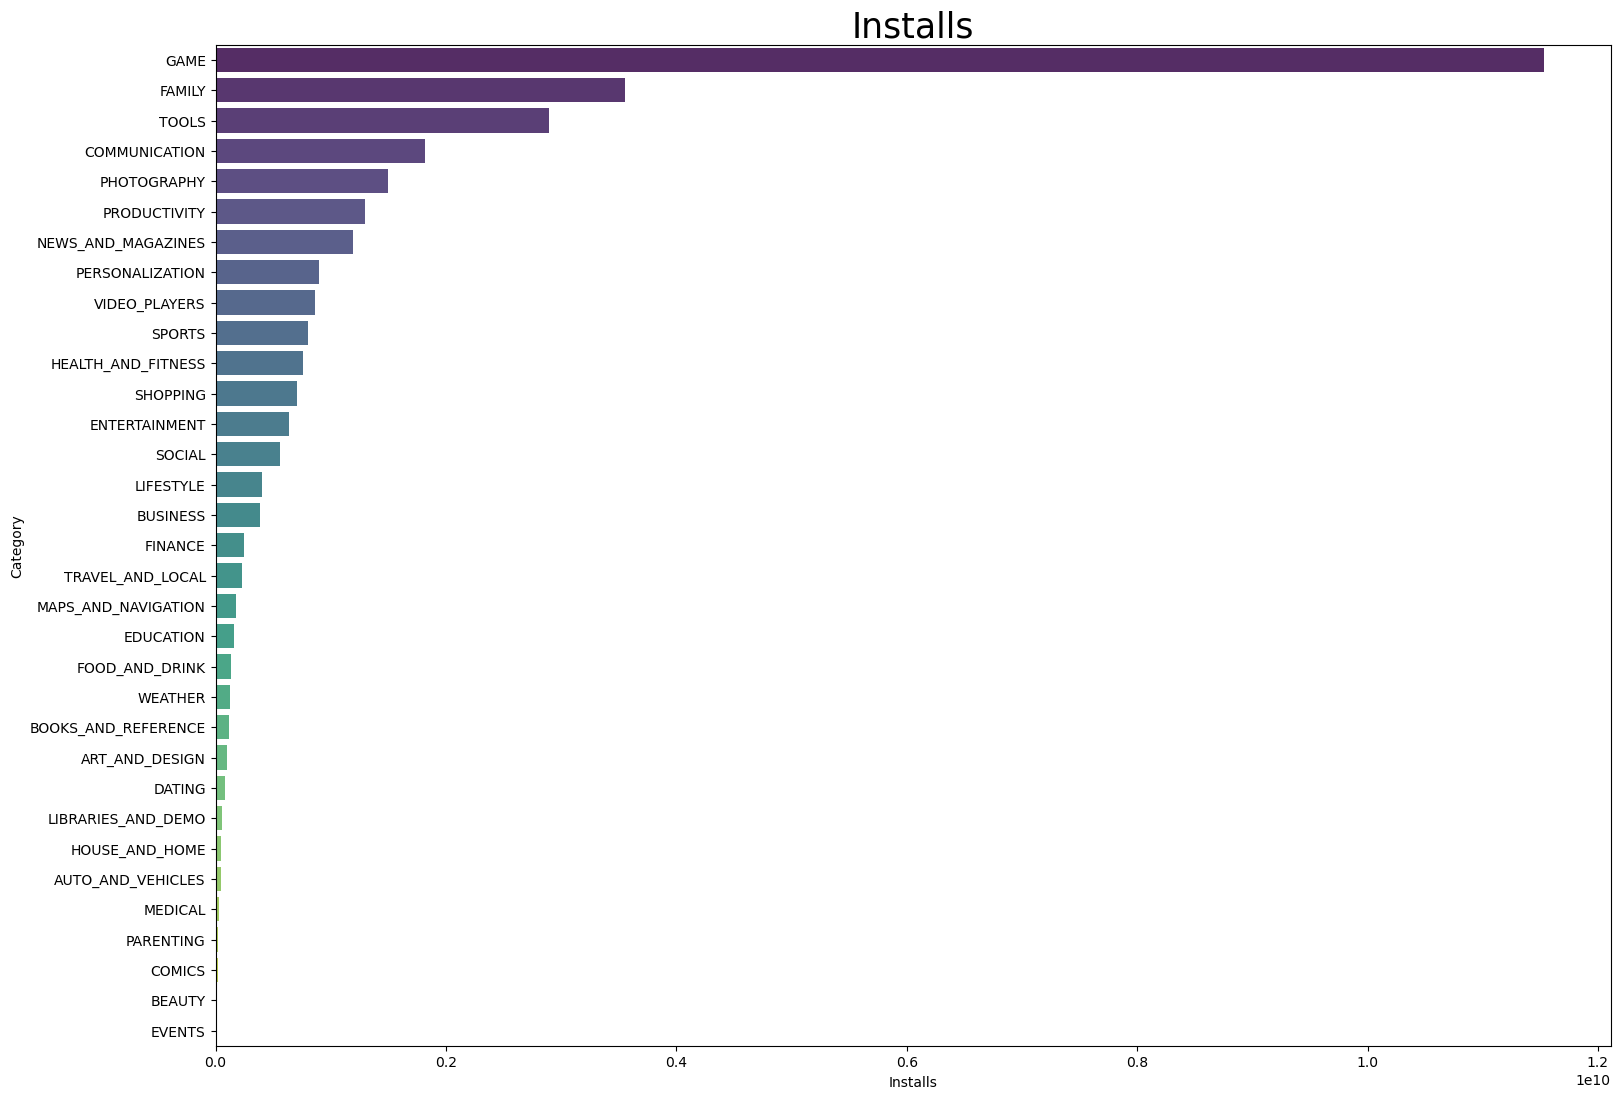

In [59]:
x3sis = []
y3sis = []

for i in range(len(Category_Installs_df)):
    x3sis.append(Category_Installs_df.Installs[i])
    y3sis.append(Category_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x3sis, y = y3sis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25)

From the above visualization, it can be interpreted that the top categories with the highest installs are Game, Family,Tools, Communication and Photography.

#### 6) What are the Top 10 installed apps in any category?

So, we have to be able to answer this not only for a single category but for many, i.e we will need to define a function which should be able to return us a nice plot for any Category

In [60]:
def findtop10incategory(str):
    str = str.upper()
    top10 = data[data['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps',size = 20)   
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

now we are done with defining the function, it’s time to check and see if everything is working fine. So let’s test it by passing Sports category to the above-defined function.

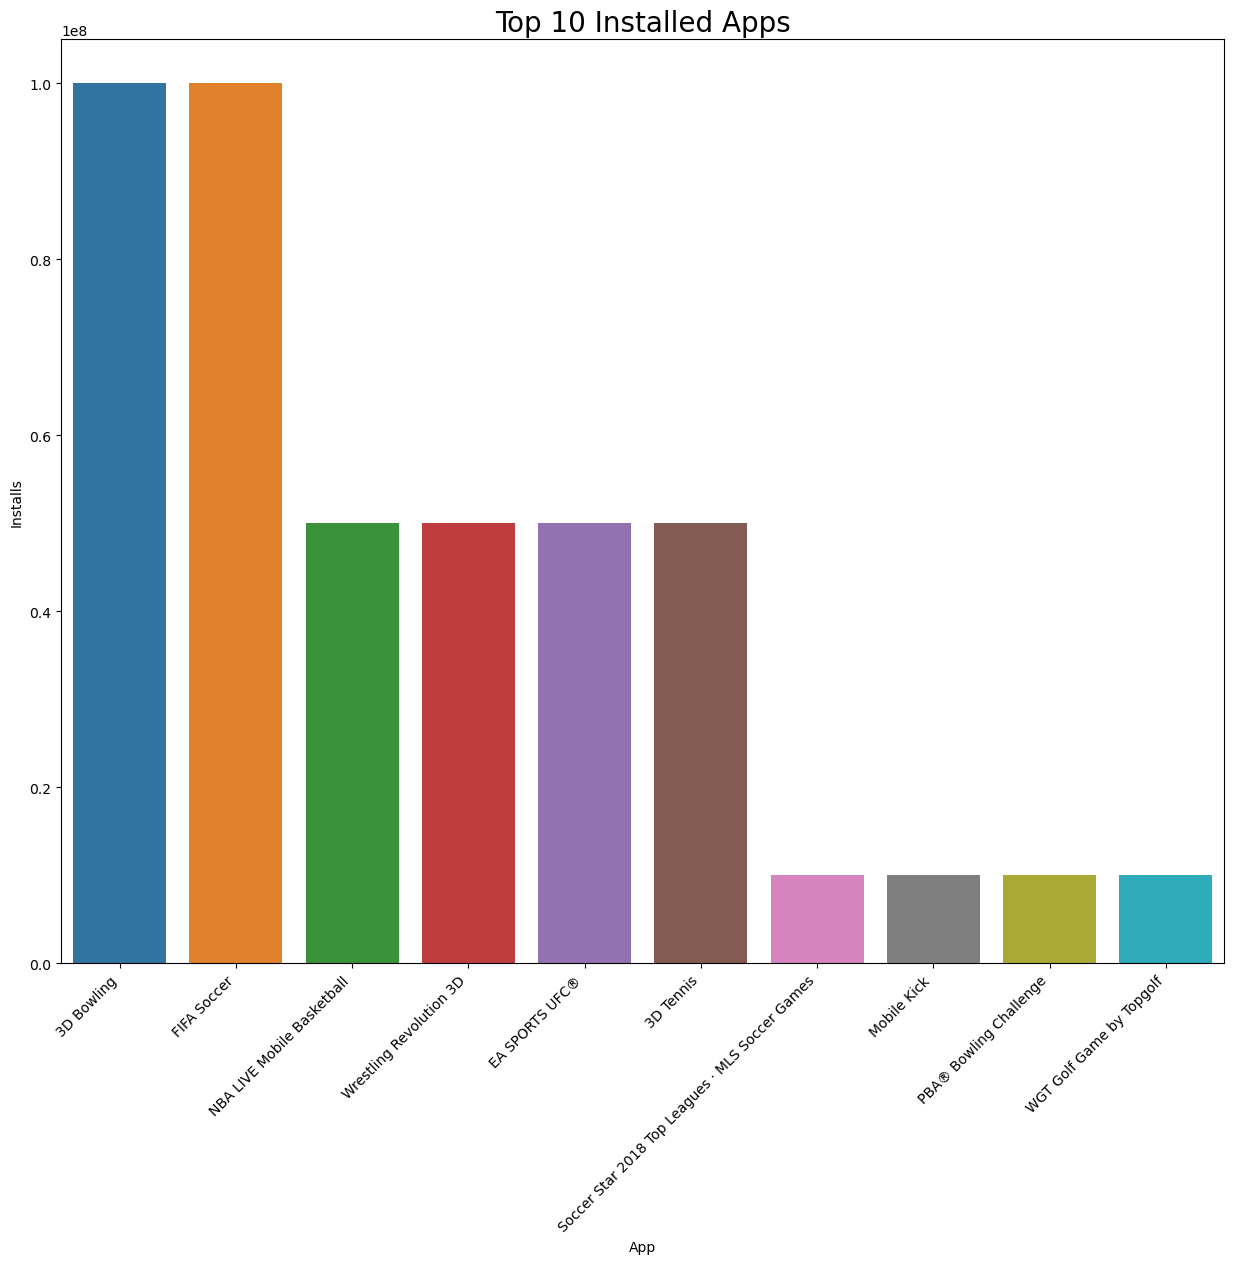

In [61]:
findtop10incategory('Sports')

From the above graph, we can see that in the Sports category 3D Bowling & FIFA Soccer has the highest installs. In the same way by passing different category names to the function, we can get the top 10 installed apps in each category. 

#### 7) Which are the top 10 expensive Apps in the play store?

Text(0.5, 1.0, 'Top 10 Expensive Apps')

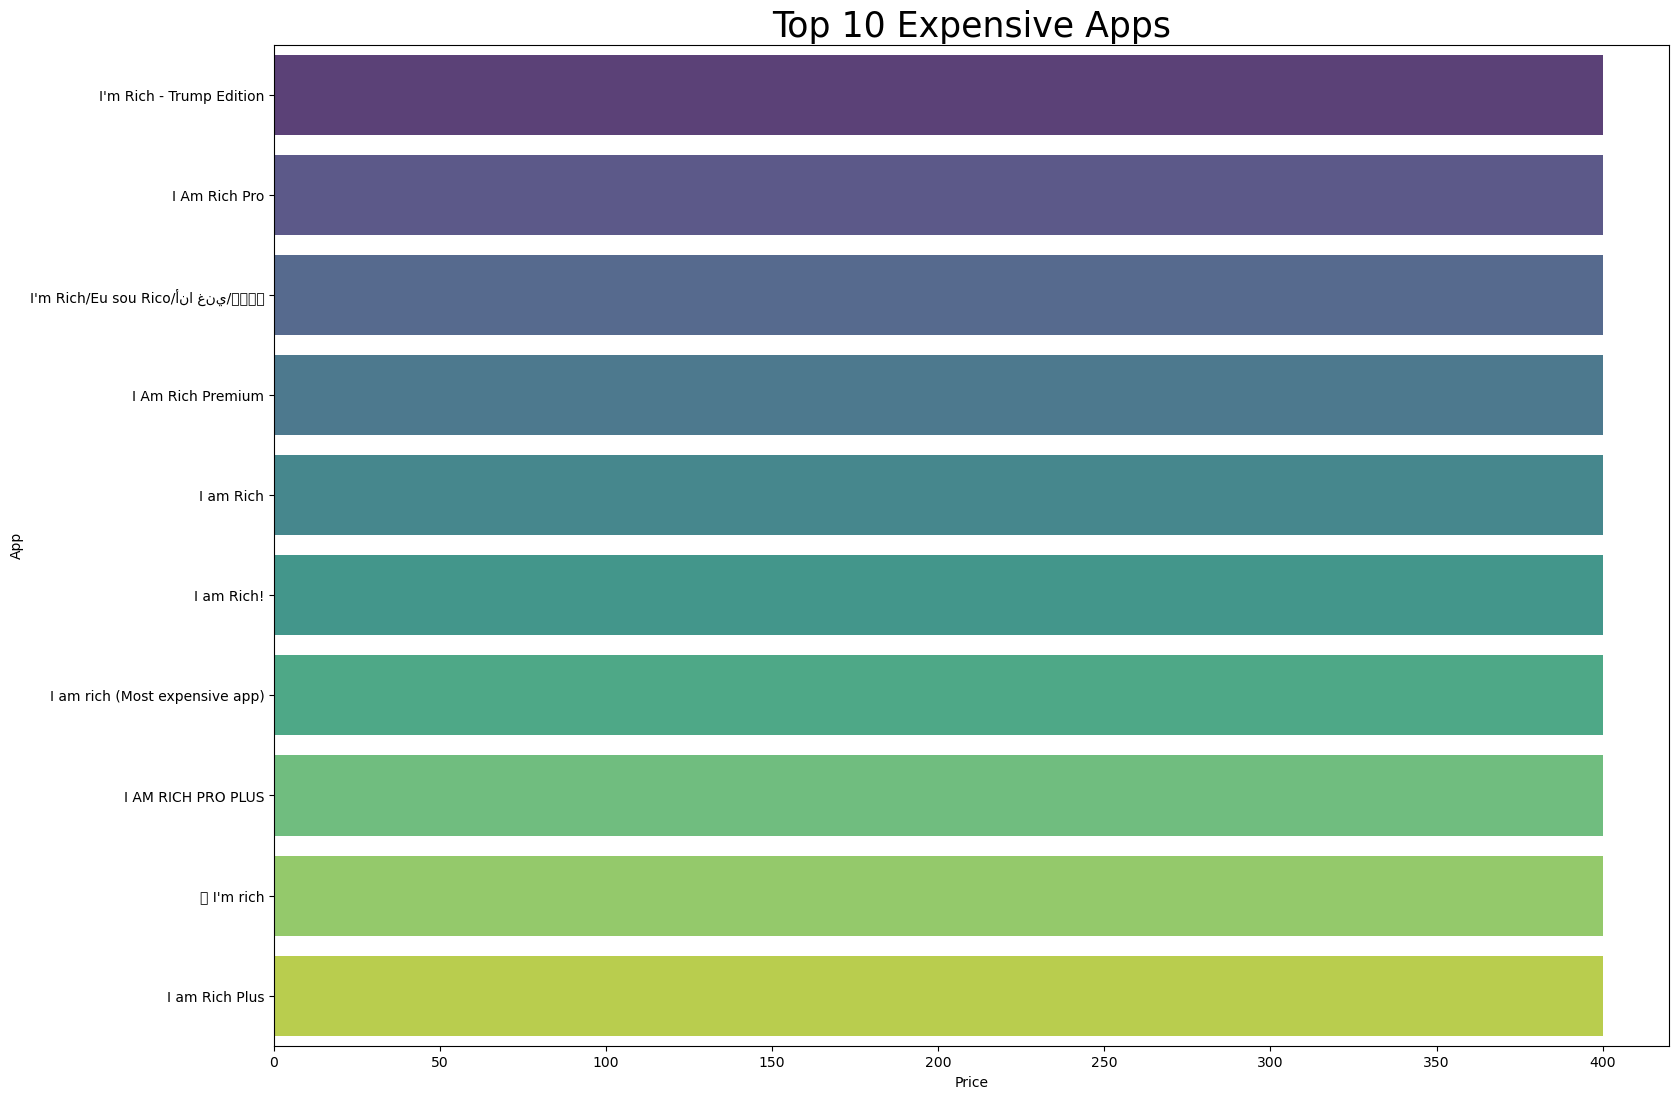

In [64]:
# top10PaidApps
top10PaidApps = data[data['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(10)
plt.figure(figsize=(18,13))
plt.xlabel("Price in USD")
plt.ylabel("App")
graph = sns.barplot(x = top10PaidApps.Price, y = top10PaidApps.App, alpha =0.9, palette= "viridis")
graph.set_title("Top 10 Expensive Apps", fontsize = 25)

From the above graph, we can interpret that the App "I am rich-Thumb edition" is the most expensive app in the google play store followed by "I am Rich Pro".

#### 8) Which are the Apps with the highest number of reviews?

In [67]:
Apps_with_Highest_rev = data.sort_values(by='Reviews', ascending=False).head(10)
Apps_with_Highest_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1670,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1654,Subway Surfers,GAME,4.5,27722264,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1660,Clash Royale,GAME,4.6,23133508,97000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1655,Candy Crush Saga,GAME,4.4,22426677,74000000.0,500000000,Free,0.0,Everyone,Casual
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000000.0,500000000,Free,0.0,Teen,Communication
1675,8 Ball Pool,GAME,4.5,14198297,52000000.0,100000000,Free,0.0,Everyone,Sports
8896,DU Battery Saver - Battery Charger & Battery Life,TOOLS,4.5,13479633,14000000.0,100000000,Free,0.0,Everyone,Tools
3239,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759663,15000000.0,100000000,Free,0.0,Everyone,Tools
1932,Shadow Fight 2,GAME,4.6,10979062,88000000.0,100000000,Free,0.0,Everyone 10+,Action
1662,Pou,GAME,4.3,10485308,24000000.0,500000000,Free,0.0,Everyone,Casual


From the above data frame we can interpret, and come to the conclusion that the Apps like Clash of Clans, Subway Surfers, Clash Royale, and Candy Crush Saga has the highest number of reviews on google play store.

#### 9) which are the top Genres in the play store, which contains the highest number of apps?

In [74]:
Top_Genres = data['Genres'].value_counts().head(20)

In [75]:
x4sis = []
y4sis = []

for i in range(len(Top_Genres)):
    x4sis.append(Top_Genres.index[i])
    y4sis.append(Top_Genres[i])

Text(0.5, 1.0, 'Top Genres in the Playstore')

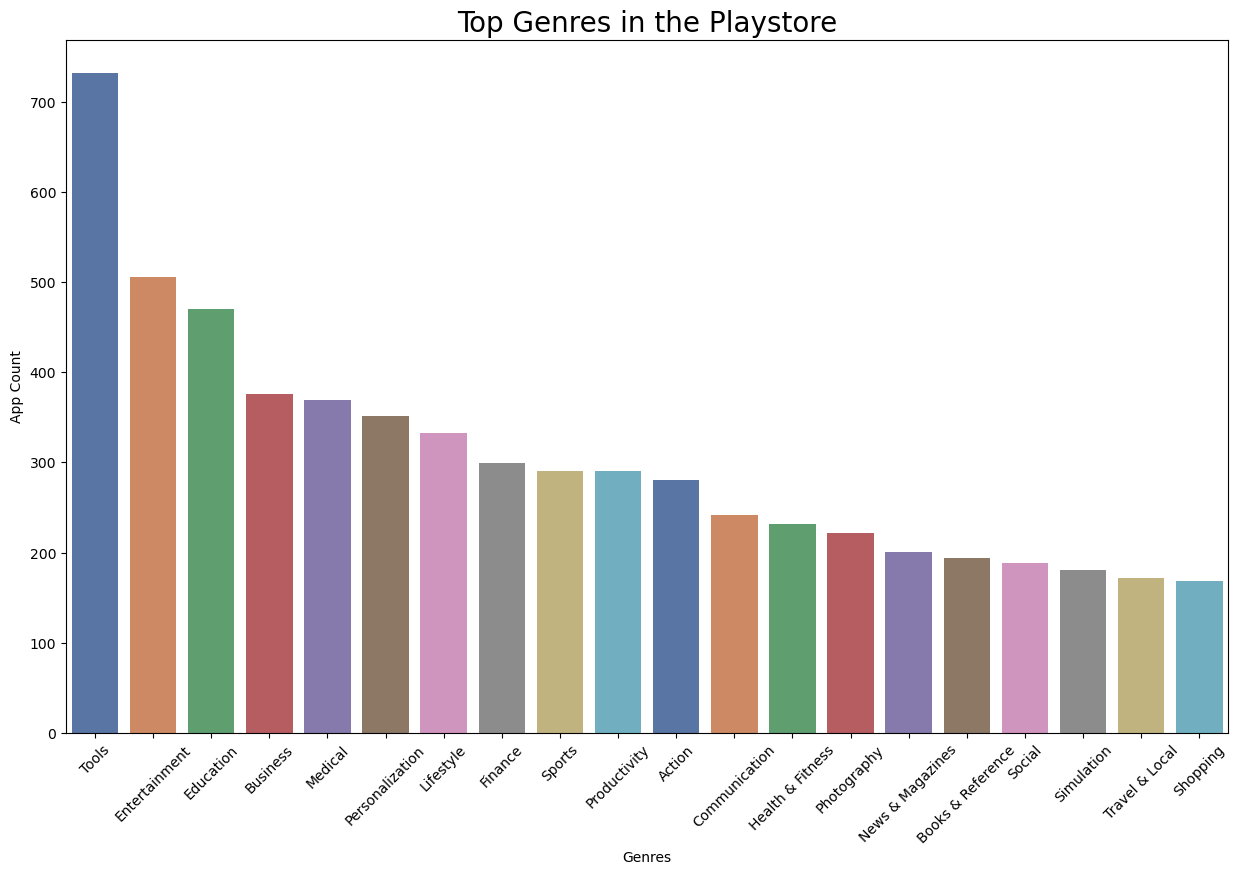

In [76]:
plt.figure(figsize=(15,9))
plt.ylabel('App Count')
plt.xlabel('Genres')
graph = sns.barplot(x=x4sis,y=y4sis,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=45, fontsize=10)
graph.set_title("Top Genres in the Playstore", fontsize = 20)

From the above visualization, we can see that the Highest Number of Apps is found in the Tools and Entertainment genres followed by Education, Business and Medical

#### 10) Which are the apps that have made the highest-earning?

we will need to create a separate data frame, and then multiply the Price column and the Installs column in order to get the earning of any particular app.

In [77]:
Paid_Apps_df = data[data['Type'] == 'Paid']

In [78]:
earning_df = Paid_Apps_df[['App', 'Installs', 'Price']]

In [79]:
earning_df['Earnings'] = earning_df['Installs'] * earning_df['Price']

In [80]:
earning_df_sorted_by_Earnings = earning_df.sort_values(by='Earnings', ascending=False).head(20)

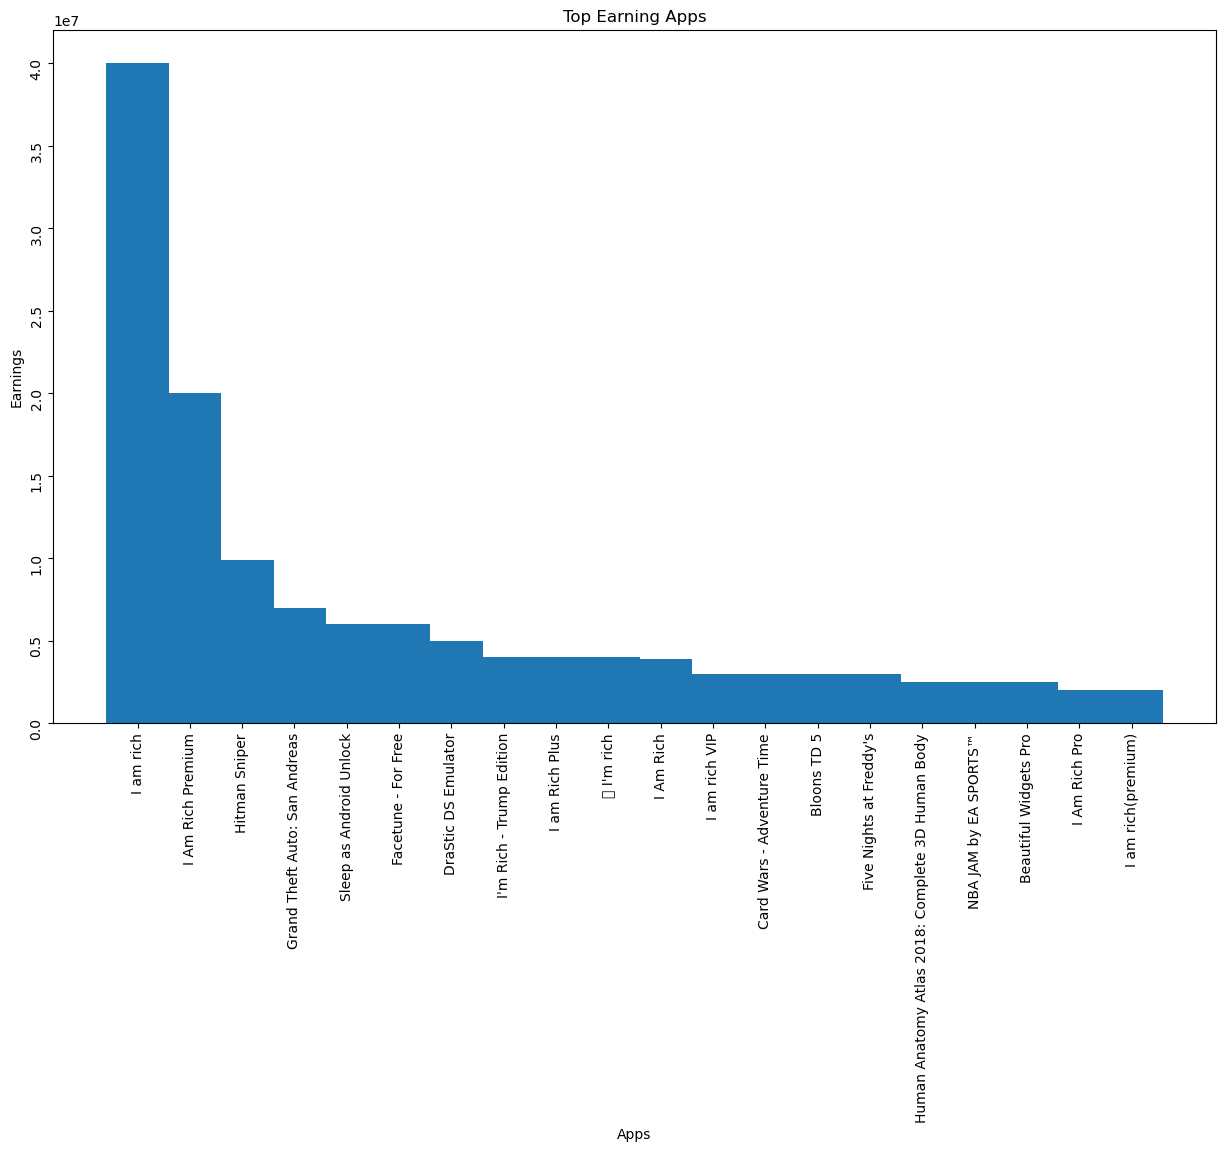

In [82]:
plt.figure(figsize=(15,9))
plt.bar(earning_df_sorted_by_Earnings.App, earning_df_sorted_by_Earnings.Earnings, width=1.2, label=earning_df_sorted_by_Earnings.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

The top five apps with the highest earnings found on google play store are:-

I am Rich

I am Rich Premium

Hitman Sniper

Grand Theft Auto: San Andreas
    
Facetune - For Free

#### Conclusion

After Analyzing the dataset we have got answers to some of the interesting questions which any of the app developers or software development companys would love to know.